In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [4]:
df = pd.read_csv('data.csv')
df.head()
df.tail()

df = df.dropna()


In [5]:
print(df.isna().sum().sort_values(ascending=False))

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64


In [6]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   student_id          500 non-null    int64
 1   hours_studied       500 non-null    int64
 2   sleep_hours         500 non-null    int64
 3   attendance_percent  500 non-null    int64
 4   previous_scores     500 non-null    int64
 5   exam_score          500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


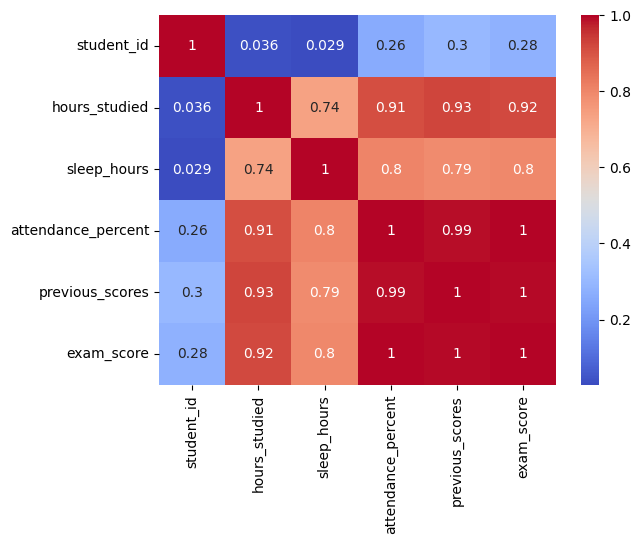

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
X = df[['hours_studied','sleep_hours','attendance_percent','previous_scores']]
y = df['exam_score']

In [13]:
X

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,2,6,75,65
1,4,7,80,70
2,5,8,85,75
3,3,5,60,55
4,8,6,90,85
...,...,...,...,...
495,3,6,81,74
496,2,4,67,61
497,9,8,100,100
498,10,7,100,100


In [14]:
y

0       60
1       72
2       78
3       52
4       88
      ... 
495     78
496     64
497    100
498    100
499     94
Name: exam_score, Length: 500, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [16]:
X_train

,hours_studied,sleep_hours,attendance_percent,previous_scores
249,4,7,80,74
433,8,7,100,97
19,5,6,82,75
322,2,4,61,55
332,10,8,100,100
...,...,...,...,...
106,3,5,64,57
270,4,7,77,71
348,10,7,100,100
435,10,7,100,100


In [17]:
y_train

249     78
433    100
19      80
322     58
332    100
      ... 
106     61
270     75
348    100
435    100
102     87
Name: exam_score, Length: 400, dtype: int64

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
input_data = np.array([[3, 5, 60, 55]])
prediction = model.predict(input_data)


c:\Users\AGP KOHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
print(prediction)

[57.34954373]


In [24]:
y_pred_train = model.predict(X_train)  
y_pred_test = model.predict(X_test) 

In [28]:
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))


Train R²: 0.9978686356106053
Test R²: 0.9937957257377477


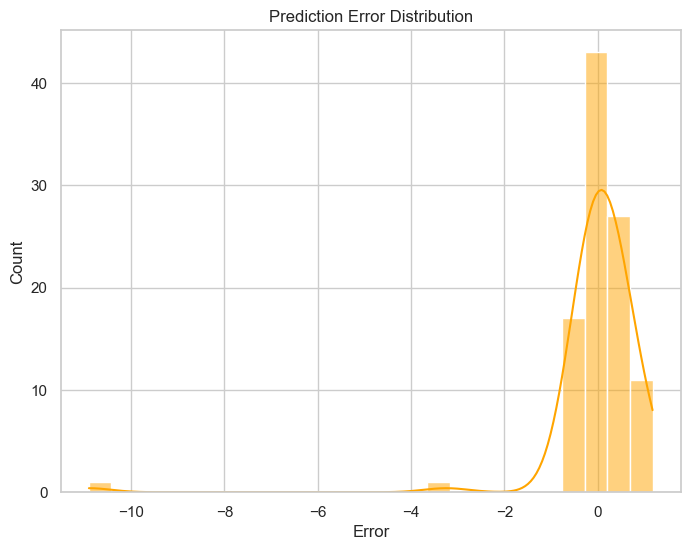

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=25, kde=True, color='orange')
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()


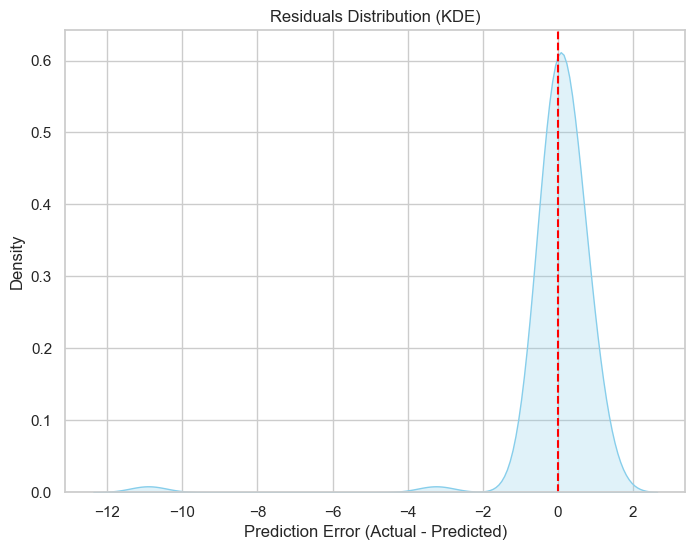

Mean Error: -0.0062372002222666366
Standard Deviation of Error: 1.2155017434937998


In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8,6))
sns.kdeplot(residuals, fill=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')  
plt.title("Residuals Distribution (KDE)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Density")
plt.show()

print("Mean Error:", np.mean(residuals))
print("Standard Deviation of Error:", np.std(residuals))


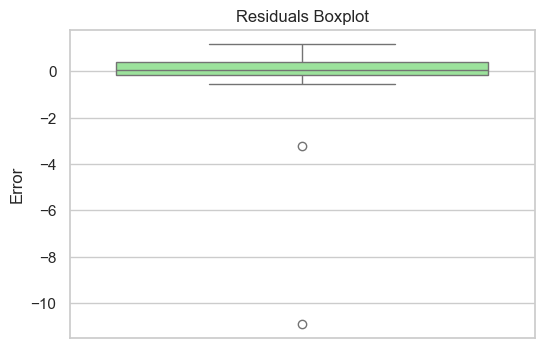

25th percentile: -0.14621805379705322
Median: 0.059900860007459755
75th percentile: 0.4026821352855521


In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(y=residuals, color='lightgreen')
plt.title("Residuals Boxplot")
plt.ylabel("Error")
plt.show()

# Optional stats
print("25th percentile:", np.percentile(residuals, 25))
print("Median:", np.median(residuals))
print("75th percentile:", np.percentile(residuals, 75))
